In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df =pd.read_csv('7458_uber.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
print(df.isnull().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [5]:
df=df.dropna()

In [6]:
df.describe

<bound method NDFrame.describe of         Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC  

In [7]:
df.head(20)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,2014-10-12 07:04:00.0000002,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,50611056,2012-03-29 19:06:00.000000273,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1


In [8]:
df.tail(20)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199980,9899790,2012-10-22 11:18:32.0000001,10.00,2012-10-22 11:18:32 UTC,-73.955423,40.764243,-73.985871,40.769660,1
199981,21553740,2014-06-02 21:51:50.0000003,9.00,2014-06-02 21:51:50 UTC,-73.980445,40.761823,-73.954004,40.784407,1
199982,13096190,2014-08-06 11:06:06.0000001,57.33,2014-08-06 11:06:06 UTC,-73.969204,40.754771,-73.790351,40.643802,1
199983,44211337,2009-08-29 02:36:56.0000003,4.50,2009-08-29 02:36:56 UTC,-74.005619,40.726378,-74.004342,40.721851,1
199984,21306884,2015-06-08 12:34:33.0000007,9.00,2015-06-08 12:34:33 UTC,-73.988243,40.759258,-73.972778,40.755070,1
199985,25830754,2015-04-18 15:16:06.0000005,24.00,2015-04-18 15:16:06 UTC,-74.005089,40.737301,-73.945290,40.774162,5
199986,236170,2013-09-07 09:54:32.0000003,12.00,2013-09-07 09:54:32 UTC,-73.964772,40.760174,-73.996794,40.763152,1
199987,47043173,2011-04-30 00:09:16.0000004,8.50,2011-04-30 00:09:16 UTC,-73.987260,40.725714,-74.006316,40.739611,2
199988,40002753,2011-10-09 02:02:40.0000001,3.70,2011-10-09 02:02:40 UTC,-73.988674,40.739342,-73.990730,40.738980,1
199989,51736746,2010-02-18 07:12:00.000000107,8.90,2010-02-18 07:12:00 UTC,-73.969152,40.790982,-73.967073,40.766705,1


In [9]:
df = df.drop(['Unnamed: 0', 'key'], axis=1, errors='ignore')

In [10]:
df['Month']=df['pickup_datetime'].str.slice(5,7)
df['Time']=df['pickup_datetime'].str.slice(11,13)

In [11]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Month,Time
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,05,19
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,07,20
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,08,21
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,06,08
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,08,17


In [12]:
df = df.drop(['pickup_datetime'], axis=1, errors='ignore')

In [13]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Month,Time
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,05,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,07,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,08,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,06,08
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,08,17


In [14]:
X=df.drop(['fare_amount'],axis=1)
y=df['fare_amount']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='fare_amount'>

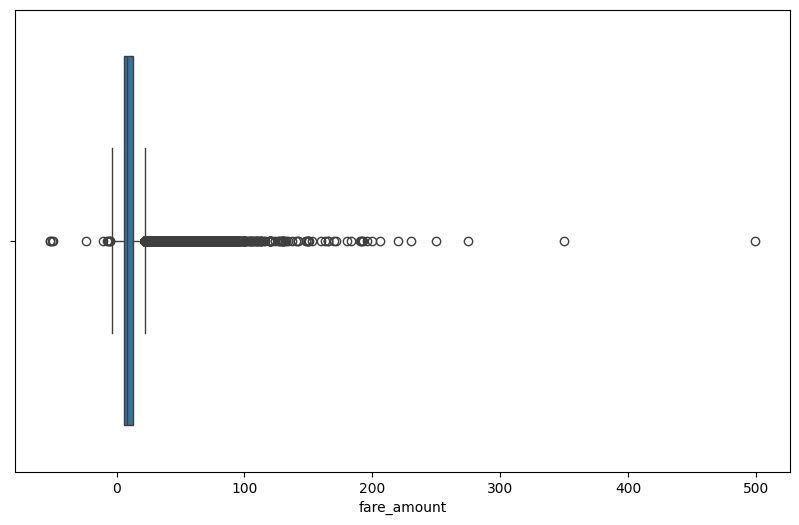

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fare_amount'])

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [18]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [19]:
print(metrics.r2_score(y_test,y_pred_lr))

0.0013437999580224735


In [20]:
print(metrics.r2_score(y_test,y_pred_rf))

0.6921284464664998


In [22]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf)))

5.6591527809421445


In [24]:
print(df.columns)

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Month',
       'Time'],
      dtype='object')
